In [1]:
import pandas as pd
import numpy as np

In [2]:
file_path = "Resources/LOS_ANGELES_COUNTY_RESTAURANT_AND_MARKET_INSPECTIONS.csv"
restaurant_list_df = pd.read_csv(file_path)
restaurant_list_df.head()

,ACTIVITY DATE,OWNER ID,OWNER NAME,FACILITY ID,FACILITY NAME,RECORD ID,PROGRAM NAME,PROGRAM STATUS,PROGRAM ELEMENT (PE),PE DESCRIPTION,...,FACILITY CITY,FACILITY STATE,FACILITY ZIP,SERVICE CODE,SERVICE DESCRIPTION,SCORE,GRADE,SERIAL NUMBER,EMPLOYEE ID,Location
0,09/10/2018,OW0105348,"GUCKENHEIMER SERVICES, LLC.",FA0242046,SERVERY- NICKELODEON,PR0190194,SERVERY- NICKELODEON,ACTIVE,1635,RESTAURANT (31-60) SEATS HIGH RISK,...,BURBANK,CA,91502,1,ROUTINE INSPECTION,96,A,DARRFUZBW,EE0000495,POINT (-118.314661 34.175253)
1,07/19/2018,OW0246461,ANASTACIOS POLITIS,FA0252769,TOMS JR BURGERS,PR0202127,TOMS JR BURGERS,ACTIVE,1632,RESTAURANT (0-30) SEATS HIGH RISK,...,LOS ANGELES,CA,90037-1867,1,ROUTINE INSPECTION,98,A,DA0XQVMTN,EE0001130,POINT (-118.292543 34.010859)
2,08/15/2018,OW0010130,DJ BIBINGKAHAN CORPORATION,FA0011237,DJ BIBINGKAHAN,PR0035416,DJ BIBINGKAHAN BAKESHOP,ACTIVE,1631,RESTAURANT (0-30) SEATS MODERATE RISK,...,WEST COVINA,CA,91792,1,ROUTINE INSPECTION,98,A,DAMPOJNY8,EE0000500,POINT (-117.913926 34.030964)
3,07/16/2018,OW0020051,KULWINDER KAUR,FA0061073,DOROSE LIQUOR,PR0027907,DOROSE LIQUOR,ACTIVE,1610,"FOOD MKT RETAIL (1-1,999 SF) LOW RISK",...,PANORAMA CITY,CA,91402,1,ROUTINE INSPECTION,91,A,DAUTU3DPD,EE0000045,POINT (-118.428399 34.221664)
4,09/07/2018,OW0246329,JUAN C OROZCO,FA0252595,MEJICO GRILL AND TEQUILLA LOUNGE,PR0201914,MEJICO GRILL AND TEQUILLA LOUNGE,ACTIVE,1641,RESTAURANT (151 + ) SEATS HIGH RISK,...,AGOURA HILLS,CA,91301,1,ROUTINE INSPECTION,90,A,DAUEU4NGF,EE0000526,POINT (-118.756808 34.143452)


In [3]:
# loop through each column, check if there are null values, 
#sum them up, and print out a readable total:
for column in restaurant_list_df.columns:
    print(f"Column {column} has {restaurant_list_df[column].isnull().sum()} null values")

Column ACTIVITY DATE has 0 null values
Column OWNER ID has 0 null values
Column OWNER NAME has 0 null values
Column FACILITY ID has 0 null values
Column FACILITY NAME has 0 null values
Column RECORD ID has 0 null values
Column PROGRAM NAME has 0 null values
Column PROGRAM STATUS has 0 null values
Column PROGRAM ELEMENT (PE) has 0 null values
Column PE DESCRIPTION has 0 null values
Column FACILITY ADDRESS has 0 null values
Column FACILITY CITY has 0 null values
Column FACILITY STATE has 0 null values
Column FACILITY ZIP has 0 null values
Column SERVICE CODE has 0 null values
Column SERVICE DESCRIPTION has 0 null values
Column SCORE has 0 null values
Column GRADE has 77 null values
Column SERIAL NUMBER has 0 null values
Column EMPLOYEE ID has 0 null values
Column Location has 7106 null values


In [4]:
pd.set_option('display.max_columns', 999)

In [5]:
#data type
restaurant_list_df.dtypes

ACTIVITY DATE           object
OWNER ID                object
OWNER NAME              object
FACILITY ID             object
FACILITY NAME           object
RECORD ID               object
PROGRAM NAME            object
PROGRAM STATUS          object
PROGRAM ELEMENT (PE)     int64
PE DESCRIPTION          object
FACILITY ADDRESS        object
FACILITY CITY           object
FACILITY STATE          object
FACILITY ZIP            object
SERVICE CODE             int64
SERVICE DESCRIPTION     object
SCORE                    int64
GRADE                   object
SERIAL NUMBER           object
EMPLOYEE ID             object
Location                object
dtype: object

In [6]:
#check PE DESCRIPTION options
restaurant_list_df.groupby("FACILITY CITY").count().index

Index(['ACTON', 'AGOURA', 'AGOURA HILLS', 'AGUA DULCE', 'ALHAMBRA', 'ALTADENA',
       'ARCADIA', 'ARLETA', 'ARTESIA', 'ATWATER',
       ...
       'WEST HOLLYWOOD', 'WEST LOS ANGELES', 'WESTCHESTER', 'WESTLAKE VILLAGE',
       'WESTWOOD', 'WHITTIER', 'WILMINGTON', 'WINNETKA', 'WOODLAND HILLS',
       'WRIGHTWOOD'],
      dtype='object', name='FACILITY CITY', length=177)

In [7]:
#check PE DESCRIPTION options
restaurant_list_df.groupby("PROGRAM STATUS").count().index

Index(['ACTIVE', 'INACTIVE'], dtype='object', name='PROGRAM STATUS')

In [8]:
#check PE DESCRIPTION options
restaurant_list_df.groupby("PE DESCRIPTION").count().index

Index(['CATERER (0-999 SQ. FT.)', 'CATERER (1,000-1,999 SQ. FT.)',
       'FOOD MARKET WHOLESALE', 'FOOD MKT RETAIL (1-1,999 SF) HIGH RISK',
       'FOOD MKT RETAIL (1-1,999 SF) LOW RISK',
       'FOOD MKT RETAIL (1-1,999 SF) MODERATE RISK',
       'FOOD MKT RETAIL (2,000+ SF) HIGH RISK',
       'FOOD MKT RETAIL (2,000+ SF) LOW RISK',
       'FOOD MKT RETAIL (2,000+ SF) MODERATE RISK',
       'FOOD PROCESSING WHOLESALE (1-1,999 SQ. FT.)',
       'FOOD PROCESSING WHOLESALE (2,000-5,999 SF)',
       'FOOD PROCESSING WHOLESALE (6,000 + SQ. FT.)',
       'FOOD VEHICLE COMMISSARY (0-10)', 'FOOD WAREHOUSE (1-4,999) SQ. FT.',
       'INTERIM HOUSING FF (1-1,999) SQ. FT.',
       'INTERIM HOUSING FF (2,000-4,999) SQ. FT.',
       'LIC HTH CARE FOOD FAC (0-1999 SF) HIGH RISK',
       'LIC HTH CARE FOOD FAC (0-1999 SF) MOD RISK',
       'LIC HTH CARE FOOD FAC (10,000+ SF) HIGH RISK',
       'LIC HTH CARE FOOD FAC (2000-3999 SF)HIGH RISK',
       'LIC HTH CARE FOOD FAC (4000-9999 SF)HIGH RISK',
 

In [9]:
#Remove all PE DESCRIPTION that are not restaurants
restaurant_list2_df= restaurant_list_df.loc[restaurant_list_df['PE DESCRIPTION'].str.contains('RESTAURANT')]
restaurant_list2_df


,ACTIVITY DATE,OWNER ID,OWNER NAME,FACILITY ID,FACILITY NAME,RECORD ID,PROGRAM NAME,PROGRAM STATUS,PROGRAM ELEMENT (PE),PE DESCRIPTION,FACILITY ADDRESS,FACILITY CITY,FACILITY STATE,FACILITY ZIP,SERVICE CODE,SERVICE DESCRIPTION,SCORE,GRADE,SERIAL NUMBER,EMPLOYEE ID,Location
0,09/10/2018,OW0105348,"GUCKENHEIMER SERVICES, LLC.",FA0242046,SERVERY- NICKELODEON,PR0190194,SERVERY- NICKELODEON,ACTIVE,1635,RESTAURANT (31-60) SEATS HIGH RISK,203 W OLIVE AVE # C,BURBANK,CA,91502,1,ROUTINE INSPECTION,96,A,DARRFUZBW,EE0000495,POINT (-118.314661 34.175253)
1,07/19/2018,OW0246461,ANASTACIOS POLITIS,FA0252769,TOMS JR BURGERS,PR0202127,TOMS JR BURGERS,ACTIVE,1632,RESTAURANT (0-30) SEATS HIGH RISK,1030 W MARTIN LUTHER KING JR BLVD STE 108,LOS ANGELES,CA,90037-1867,1,ROUTINE INSPECTION,98,A,DA0XQVMTN,EE0001130,POINT (-118.292543 34.010859)
2,08/15/2018,OW0010130,DJ BIBINGKAHAN CORPORATION,FA0011237,DJ BIBINGKAHAN,PR0035416,DJ BIBINGKAHAN BAKESHOP,ACTIVE,1631,RESTAURANT (0-30) SEATS MODERATE RISK,1515 E AMAR RD,WEST COVINA,CA,91792,1,ROUTINE INSPECTION,98,A,DAMPOJNY8,EE0000500,POINT (-117.913926 34.030964)
4,09/07/2018,OW0246329,JUAN C OROZCO,FA0252595,MEJICO GRILL AND TEQUILLA LOUNGE,PR0201914,MEJICO GRILL AND TEQUILLA LOUNGE,ACTIVE,1641,RESTAURANT (151 + ) SEATS HIGH RISK,29002 AGOURA RD,AGOURA HILLS,CA,91301,1,ROUTINE INSPECTION,90,A,DAUEU4NGF,EE0000526,POINT (-118.756808 34.143452)
5,09/18/2018,OW0123199,REDONDO ENTERPRISES LLC,FA0158101,MCDONALD'S #10681,PR0146191,MCDONALD'S #10681,ACTIVE,1637,RESTAURANT (61-150) SEATS MODERATE RISK,5725 FLORENCE AVE,BELL GARDENS,CA,90201,1,ROUTINE INSPECTION,91,A,DARQIUA45,EE0000437,POINT (-118.163665 33.967791)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210418,02/27/2020,OW0267763,"CALIF CHICKEN NINE , INC",FA0278951,CALIFORNIA CHICKEN CAFE,PR0233062,CALIFORNIA CHICKEN CAFE,ACTIVE,1635,RESTAURANT (31-60) SEATS HIGH RISK,809 S HILL ST,LOS ANGELES,CA,90014-3103,1,ROUTINE INSPECTION,96,A,DA96YTYI2,EE0001064,POINT (-118.255985 34.044257)
210419,03/10/2020,OW0027458,PANDA EXPRESS INC.,FA0043076,PANDA EXPRESS #2018,PR0020389,PANDA EXPRESS #2018,ACTIVE,1635,RESTAURANT (31-60) SEATS HIGH RISK,15528 WHITTIER BLVD # #B,WHITTIER,CA,90603,1,ROUTINE INSPECTION,95,A,DAUHBHK0C,EE0000926,POINT (-117.995246 33.945004)
210420,03/31/2020,OW0016998,"IN-N-OUT BURGERS, INC.",FA0030146,IN-N-OUT BURGER #27,PR0020544,IN-N-OUT BURGER #27,ACTIVE,1631,RESTAURANT (0-30) SEATS MODERATE RISK,420 N SANTA ANITA AVE,ARCADIA,CA,91006,1,ROUTINE INSPECTION,100,A,DAPOZY6B7,EE0000232,POINT (-118.031451 34.145206)
210425,03/03/2020,OW0255835,LA FIESTA # 1 LLC,FA0264750,LA FIESTA # 1,PR0215888,LA FIESTA # 1,ACTIVE,1635,RESTAURANT (31-60) SEATS HIGH RISK,18515 ROSCOE BLVD,NORTHRIDGE,CA,91324,1,ROUTINE INSPECTION,96,A,DAH0HFNIW,EE0000688,POINT (-118.53732 34.220723)


In [10]:
#check PE DESCRIPTION options
restaurant_list2_df.groupby("PE DESCRIPTION").count().index

Index(['RESTAURANT (0-30) SEATS HIGH RISK', 'RESTAURANT (0-30) SEATS LOW RISK',
       'RESTAURANT (0-30) SEATS MODERATE RISK',
       'RESTAURANT (151 + ) SEATS HIGH RISK',
       'RESTAURANT (151 + ) SEATS LOW RISK',
       'RESTAURANT (151 + ) SEATS MODERATE RISK',
       'RESTAURANT (31-60) SEATS HIGH RISK',
       'RESTAURANT (31-60) SEATS LOW RISK',
       'RESTAURANT (31-60) SEATS MODERATE RISK',
       'RESTAURANT (61-150) SEATS HIGH RISK',
       'RESTAURANT (61-150) SEATS LOW RISK',
       'RESTAURANT (61-150) SEATS MODERATE RISK'],
      dtype='object', name='PE DESCRIPTION')

In [11]:
#check PE DESCRIPTION options
restaurant_list2_df.groupby("PE DESCRIPTION").count().index

Index(['RESTAURANT (0-30) SEATS HIGH RISK', 'RESTAURANT (0-30) SEATS LOW RISK',
       'RESTAURANT (0-30) SEATS MODERATE RISK',
       'RESTAURANT (151 + ) SEATS HIGH RISK',
       'RESTAURANT (151 + ) SEATS LOW RISK',
       'RESTAURANT (151 + ) SEATS MODERATE RISK',
       'RESTAURANT (31-60) SEATS HIGH RISK',
       'RESTAURANT (31-60) SEATS LOW RISK',
       'RESTAURANT (31-60) SEATS MODERATE RISK',
       'RESTAURANT (61-150) SEATS HIGH RISK',
       'RESTAURANT (61-150) SEATS LOW RISK',
       'RESTAURANT (61-150) SEATS MODERATE RISK'],
      dtype='object', name='PE DESCRIPTION')

In [12]:
# loop through each column, check if there are null values, 
#sum them up, and print out a readable total:
for column in restaurant_list2_df.columns:
    print(f"Column {column} has {restaurant_list2_df[column].isnull().sum()} null values")

Column ACTIVITY DATE has 0 null values
Column OWNER ID has 0 null values
Column OWNER NAME has 0 null values
Column FACILITY ID has 0 null values
Column FACILITY NAME has 0 null values
Column RECORD ID has 0 null values
Column PROGRAM NAME has 0 null values
Column PROGRAM STATUS has 0 null values
Column PROGRAM ELEMENT (PE) has 0 null values
Column PE DESCRIPTION has 0 null values
Column FACILITY ADDRESS has 0 null values
Column FACILITY CITY has 0 null values
Column FACILITY STATE has 0 null values
Column FACILITY ZIP has 0 null values
Column SERVICE CODE has 0 null values
Column SERVICE DESCRIPTION has 0 null values
Column SCORE has 0 null values
Column GRADE has 68 null values
Column SERIAL NUMBER has 0 null values
Column EMPLOYEE ID has 0 null values
Column Location has 5889 null values


In [13]:
#use the describe() method to print out some stats on central tendency and spread.
restaurant_list2_df['SCORE'].describe()

count    171862.000000
mean         93.535046
std           3.937322
min          52.000000
25%          91.000000
50%          94.000000
75%          96.000000
max         100.000000
Name: SCORE, dtype: float64

In [14]:
#histogram of the score distributions
restaurant_list2_df['SCORE'].plot(kind='hist')

In [15]:
#use the describe() method to print out some stats on central tendency and spread.
restaurant_list2_df['PROGRAM STATUS'].describe()

count     171862
unique         2
top       ACTIVE
freq      152040
Name: PROGRAM STATUS, dtype: object

In [19]:
#check PE DESCRIPTION options
restaurant_list2_df.groupby("GRADE").count().index

Index(['A', 'B', 'C'], dtype='object', name='GRADE')

In [20]:
#count program name value
restaurant_list2_df['SCORE'].value_counts(dropna=False)

90     22371
95     18948
96     18858
94     18242
93     16614
97     16610
92     14854
91     13776
98     12773
99      6603
100     2775
80      1495
85      1092
84      1088
83       988
86       945
82       926
81       884
87       649
88       291
75       140
77       130
74       124
76       117
70        96
73        85
78        85
71        80
72        76
89        51
79        28
65        12
66        11
67        10
68         9
69         6
63         4
64         4
62         3
60         3
61         2
59         1
55         1
54         1
52         1
Name: SCORE, dtype: int64

In [21]:
#count program name value 
# WE CAN DROP
restaurant_list2_df['SERVICE DESCRIPTION'].value_counts(dropna=False)

ROUTINE INSPECTION                  168923
OWNER INITIATED ROUTINE INSPECT.      2939
Name: SERVICE DESCRIPTION, dtype: int64

In [22]:
#count program name value
restaurant_list2_df['PROGRAM NAME'].value_counts(dropna=False)

SUBWAY                              621
WABA GRILL                          409
DOMINO'S PIZZA                      366
EL POLLO LOCO                       355
JERSEY MIKE'S SUBS                  301
                                   ... 
JAMAFO JAMAICAN FOOD & FIMIWINGS      1
XOK                                   1
JIVANA AT INDIAN SUMMERS CLUB         1
BOTTOMS UP TIKI LOUNGE                1
BARCLAY'S COFFEE AND TEA              1
Name: PROGRAM NAME, Length: 28987, dtype: int64

In [23]:
restaurant_list2_df['PROGRAM NAME'].value_counts(dropna=False).head(2000)

SUBWAY                    621
WABA GRILL                409
DOMINO'S PIZZA            366
EL POLLO LOCO             355
JERSEY MIKE'S SUBS        301
                         ... 
ACE SUSHI - VONS            9
TAN KHAI HOAN               9
LAS CASITAS RESTAURANT      9
WHICH WHICH                 9
PI                          9
Name: PROGRAM NAME, Length: 2000, dtype: int64

In [24]:
restaurant_list2_df['PROGRAM NAME'].value_counts(dropna=False).tail(2255)

STARBUCKS COFFEE #5491              2
LAS TRANCAS                         2
PEDROZA'S MEXICAN FOOD              2
BOBA RICA                           2
FEU PHO KITCHEN                     1
                                   ..
JAMAFO JAMAICAN FOOD & FIMIWINGS    1
XOK                                 1
JIVANA AT INDIAN SUMMERS CLUB       1
BOTTOMS UP TIKI LOUNGE              1
BARCLAY'S COFFEE AND TEA            1
Name: PROGRAM NAME, Length: 2255, dtype: int64

In [25]:
#count serial number valie
restaurant_list2_df['SERIAL NUMBER'].value_counts(dropna=False)

DARCA4TB0    1
DAFROCP93    1
DAQR6BAJU    1
DAENDJPI0    1
DAXXQJPVI    1
            ..
DAEI3M8QC    1
DA0GCLSY1    1
DASDZJJZO    1
DA72XBTDT    1
DA5YH4PAG    1
Name: SERIAL NUMBER, Length: 171862, dtype: int64

In [26]:
file_path = "Resources/LOS_ANGELES_COUNTY_RESTAURANT_AND_MARKET_VIOLATIONS.csv"
violation_list_df = pd.read_csv(file_path)
violation_list_df

,SERIAL NUMBER,VIOLATION STATUS,VIOLATION CODE,VIOLATION DESCRIPTION,POINTS
0,DA000211Z,OUT OF COMPLIANCE,F006,# 06. Adequate handwashing facilities supplied...,2.0
1,DA000211Z,OUT OF COMPLIANCE,F044,"# 44. Floors, walls and ceilings: properly bui...",1.0
2,DA000211Z,OUT OF COMPLIANCE,F014,# 14. Food contact surfaces: clean and sanitized,2.0
3,DA000211Z,OUT OF COMPLIANCE,F029,"# 29. Toxic substances properly identified, st...",1.0
4,DA000211Z,OUT OF COMPLIANCE,F035,# 35. Equipment/Utensils - approved; installed...,1.0
...,...,...,...,...,...
971326,DAZZZ6W6B,OUT OF COMPLIANCE,F006,# 06. Adequate handwashing facilities supplied...,2.0
971327,DAZZZ6W6B,OUT OF COMPLIANCE,F030,# 30. Food properly stored; food storage conta...,1.0
971328,DAZZZ6W6B,OUT OF COMPLIANCE,F044,"# 44. Floors, walls and ceilings: properly bui...",1.0
971329,DAZZZIUVR,OUT OF COMPLIANCE,F035,# 35. Equipment/Utensils - approved; installed...,1.0


In [27]:
# ATTENTION - SERIAL NUMBER IS COMMING AS INDEX 

In [28]:
# loop through each column, check if there are null values, 
#sum them up, and print out a readable total:
for column in violation_list_df.columns:
    print(f"Column {column} has {violation_list_df[column].isnull().sum()} null values")

Column SERIAL NUMBER has 0 null values
Column VIOLATION  STATUS has 0 null values
Column VIOLATION CODE has 0 null values
Column VIOLATION DESCRIPTION has 0 null values
Column POINTS has 0 null values


In [29]:
#data type
violation_list_df.dtypes

SERIAL NUMBER             object
VIOLATION  STATUS         object
VIOLATION CODE            object
VIOLATION DESCRIPTION     object
POINTS                   float64
dtype: object

In [30]:
#Reasonability Checks on violation Data
violation_list_df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971331 entries, 0 to 971330
Data columns (total 5 columns):
SERIAL NUMBER            971331 non-null object
VIOLATION  STATUS        971331 non-null object
VIOLATION CODE           971331 non-null object
VIOLATION DESCRIPTION    971331 non-null object
POINTS                   971331 non-null float64
dtypes: float64(1), object(4)
memory usage: 37.1+ MB


In [31]:
#use the describe() method to print out some stats on central tendency and spread.
violation_list_df['POINTS'].describe()

count    971331.000000
mean          1.336050
std           0.891329
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          11.000000
Name: POINTS, dtype: float64

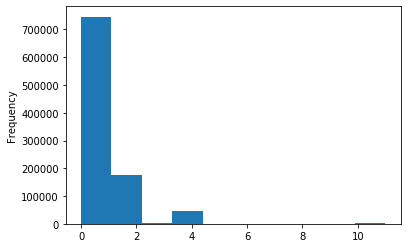

In [32]:
#histogram of the points distributions
violation_list_df['POINTS'].plot(kind='hist')

In [33]:
violation_list_df.index.value_counts(dropna=False)

2047      1
823495    1
798931    1
800978    1
794833    1
         ..
374300    1
364059    1
362010    1
368153    1
0         1
Length: 971331, dtype: int64

In [34]:
violation_list_df.index.value_counts(dropna=False).tail(12740)

97928     1
67207     1
69254     1
71301     1
73348     1
         ..
374300    1
364059    1
362010    1
368153    1
0         1
Length: 12740, dtype: int64

In [35]:
#count serial number valie
violation_list_df['SERIAL NUMBER'].value_counts(dropna=False)

DAELDAETV    27
DANKB40O8    24
DAXPIB7H8    23
DABCZMF1J    22
DAV1HWO03    22
             ..
DA139HZNB     1
DAM2M2CFF     1
DAPP7D0RK     1
DABWIC0I0     1
DAEJRPWZW     1
Name: SERIAL NUMBER, Length: 205850, dtype: int64

In [36]:
#count program name value
restaurant_list2_df['PROGRAM NAME'].value_counts(dropna=False)

SUBWAY                              621
WABA GRILL                          409
DOMINO'S PIZZA                      366
EL POLLO LOCO                       355
JERSEY MIKE'S SUBS                  301
                                   ... 
JAMAFO JAMAICAN FOOD & FIMIWINGS      1
XOK                                   1
JIVANA AT INDIAN SUMMERS CLUB         1
BOTTOMS UP TIKI LOUNGE                1
BARCLAY'S COFFEE AND TEA              1
Name: PROGRAM NAME, Length: 28987, dtype: int64